In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def get_rules(rule_array):
  rule_array = np.asarray(rule_vector, dtype=np.uint8)
  binary_rules = np.unpackbits(rule_array[:, np.newaxis], axis=1,bitorder='little')[:,-8:]
  return binary_rules

def evolve(config, rules, boundary="periodic"):
  config_len = len(config)
  next_config = np.zeros_like(config)

  for i in range(config_len):
    left = config[i - 1] if i> 0 else (config[-1] if boundary == "periodic" else 0)
    right = config[i + 1] if i < config_len-1 else (config[0] if boundary == "periodic" else 0)
    neighbourhood = np.array([left, config[i], right])
    binary_vector = np.array([4,2,1])
    neighbourhood_decimal = np.dot(binary_vector, neighbourhood).astype(np.int8)
    next_config[i] = rules[i][7-neighbourhood_decimal]
  return next_config

def simulate_eca(binary_rules, n, steps, boundary = "null", plot=True):
  rule = get_rules(rule_vector)
  config_all = list(product([0, 1], repeat=n))
  print(f"\n Rule vector {binary_rules} | Lattice size ={n} | Boundary = {boundary}")
  transitions = []
  for initial in config_all:
    config = np.array(initial, dtype = np.int8)
    history = [config.copy()]

    for _ in range(steps - 1):
      config = evolve(config, rule, boundary)
      history.append(config.copy())
    start = ''.join(str(bit) for bit in history[0])
    end = ''.join(str(bit) for bit in history[-1])
    transitions.append((start, end))

    print("Initial:", ''.join(str(bit) for bit in history[0]))
    for step in history[1:]:
      print("       " + ''.join(str(bit) for bit in step))
    print()
  if plot:
    draw_graph(transitions)

def draw_graph(transitions):
  g = nx.DiGraph()
  g.add_edges_from(transitions)
  pos = graphviz_layout(g, prog='dot')
  plt.figure(figsize=(10,8))
  nx.draw(g, pos, with_labels=True, node_size=700, node_color='green', arrows=True, arrowsize=20)
  plt.title("transition diagram of the CA")
  plt.show()

Enter the lattice size: 4
Enter the rule vector with only a single space as the gap: 30 40 50 60
Enter number of steps:2

 Rule vector [30 40 50 60] | Lattice size =4 | Boundary = periodic
Initial: 0000
       0000

Initial: 0001
       1001

Initial: 0010
       0011

Initial: 0011
       1010

Initial: 0100
       0100

Initial: 0101
       1101

Initial: 0110
       0011

Initial: 0111
       1000

Initial: 1000
       0100

Initial: 1001
       1101

Initial: 1010
       0011

Initial: 1011
       1010

Initial: 1100
       1000

Initial: 1101
       0001

Initial: 1110
       1011

Initial: 1111
       0000



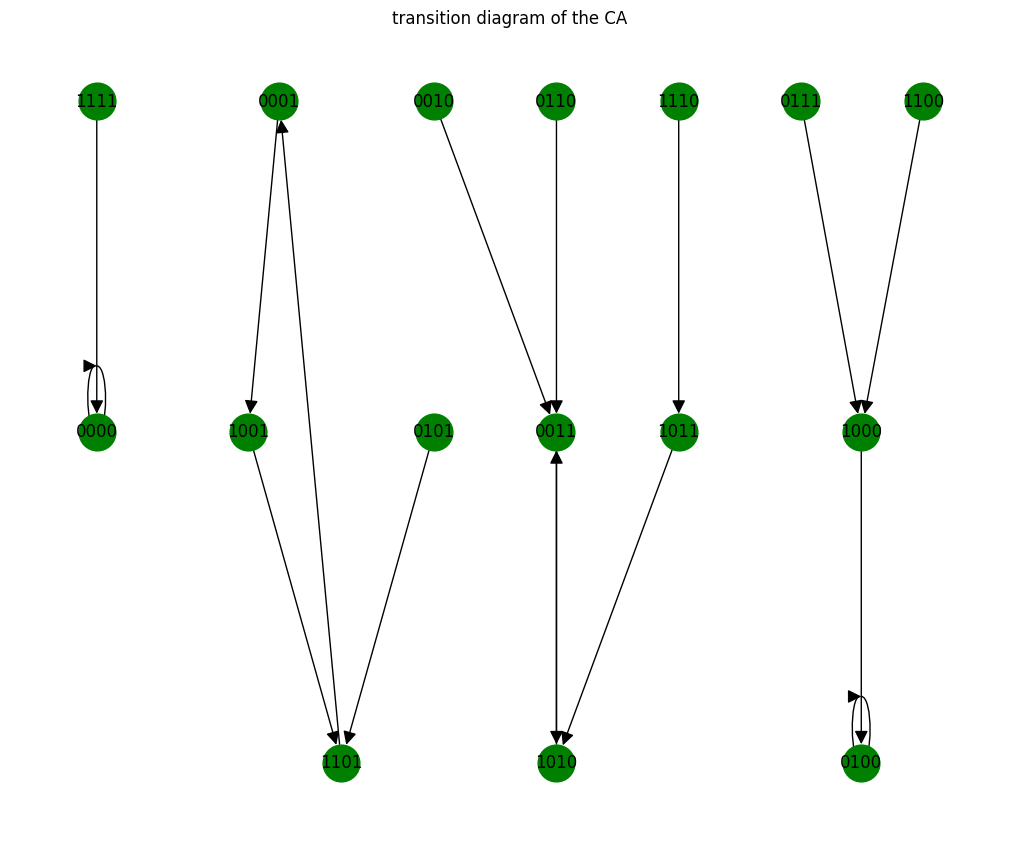

In [3]:
# For testing
'''
n = 4
rule_vector = np.array([30, 40, 50, 60])
simulate_eca(rule_vector, n, steps=2, boundary="periodic")
'''
# With user input
n=int(input("Enter the lattice size: "))
rule_vector = input("Enter the rule vector with only a single space as the gap: ")
rule_vector = np.array([int(x) for x in rule_vector.split() if x], dtype=np.uint8)
steps = int(input("Enter number of steps:"))
simulate_eca(rule_vector, n, steps, boundary="periodic")